In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("oilseed production.csv",index_col="year")

In [4]:
df.head()

,production
year,
1950,5.16
1951,5.03
1952,4.73
1953,5.37
1954,6.40


In [5]:
df.describe()

,production
count,70.000000
mean,15.838714
std,9.139210
min,4.730000
25%,7.475000
50%,12.365000
75%,24.335000
max,33.420000


In [6]:
df.shape

(70, 1)

<AxesSubplot:xlabel='year'>

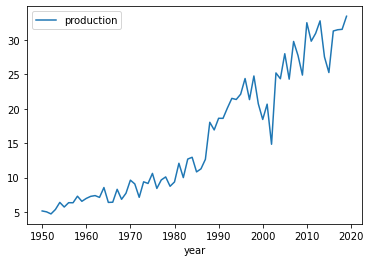

In [7]:
df.plot()

# ADF TEST

In [8]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df)

1. ADF :  0.23810317240193854
2. P-Value :  0.9743195141523098
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 67
5. Critical Values :
	 1% :  -3.5319549603840894
	 5% :  -2.905755128523123
	 10% :  -2.5903569458676765


In [9]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=320.308, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=336.221, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=319.987, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=317.397, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=335.805, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=319.120, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=319.221, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=321.089, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=322.898, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.389 seconds


# TRAINING THE MODEL

In [10]:
print(df.shape)
train=df.iloc[:-20]
test=df.iloc[-20:]
print(train.shape,test.shape)

(70, 1)
(50, 1) (20, 1)


In [20]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(0,1,1))
model=model.fit()
model.summary()

C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                   50
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -92.899
Date:                Tue, 09 Aug 2022   AIC                            189.799
Time:                        23:52:23   BIC                            193.582
Sample:                             0   HQIC                           191.234
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3298      0.149     -2.212      0.027      -0.622      -0.038
sigma2         2.5898      0.386      6.711      0.000       1.833       3.346
===================================================================================
Ljung-Box (L1) (Q):                   2.60   Jarque-Bera (JB):                 7.55
Prob(Q):                              0.11   Prob(JB):                         0.02
Heteroskedasticity (H):               9.21   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred

C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


50    21.748631
51    21.748631
52    21.748631
53    21.748631
54    21.748631
55    21.748631
56    21.748631
57    21.748631
58    21.748631
59    21.748631
60    21.748631
61    21.748631
62    21.748631
63    21.748631
64    21.748631
65    21.748631
66    21.748631
67    21.748631
68    21.748631
69    21.748631
Name: ARIMA Predictions, dtype: float64

In [22]:
test.head()

,production
year,
2000,18.44
2001,20.66
2002,14.84
2003,25.19
2004,24.35


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

7.3525988007439675


In [24]:
model2 = ARIMA(df,order=(0,1,1))
model2 = model2.fit()
df.tail()

C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,production
year,
2015,25.25
2016,31.28
2017,31.46
2018,31.52
2019,33.42


# PREDICTING FOR NEXT 10 YEARS

In [25]:
pred = model2.predict(start =len(df),end = len(df)+10,typ="levels").rename("arima prediction")
pred

C:\Users\csara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


70    32.434263
71    32.434263
72    32.434263
73    32.434263
74    32.434263
75    32.434263
76    32.434263
77    32.434263
78    32.434263
79    32.434263
80    32.434263
Name: arima prediction, dtype: float64